<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/Cluster_average_HMM_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HMM Analysis

### Access and understand data

Get data files:

In [2]:
#get data from google drive
!gdown --id 1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
#unzip data
!unzip 'NewData.zip'

Downloading...
From: https://drive.google.com/uc?id=1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
To: /content/NewData.zip
127MB [00:01, 89.7MB/s]
Archive:  NewData.zip
  inflating: Cluster.pkl             
  inflating: BN.pkl                  
  inflating: SFA.pkl                 


Get a list of data for all three models:

In [3]:
import pickle

#create a list of model name strings
models = ['BN.pkl', "SFA.pkl", "Cluster.pkl"]

#create a list of model names
model_names = ["Balanced Network", "Clustered with SFA", "Clustered wo SFA"]

#create lists to store model data
models_x = []
models_y = []

#for all models
for i in range(len(models)):

  #open pickle file
  with open(models[i], 'rb') as f:
    #get x (actual data: time * neuron id)
    x = pickle.load(f)
    #get y (information on data, such as inhibitory/excitatory neurons, clusters, etc.)
    y = pickle.load(f)
    #add x and y to the models lists
    models_x.append(x)
    models_y.append(y)

###Extract certain time range

In [4]:
import numpy as np
import pandas as pd

time_range_models = []

time_range = 5000

for model in range(len(models)):
  #set condition: returns True for time <= 5 s
  condition = [True if i <= time_range else False for i in models_x[model][0]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, models_x[model][0])
  new_y = np.extract(condition, models_x[model][1])

  new = [new_x, new_y]

  time_range_models.append(new)

### Create raster plots from data for one cluster

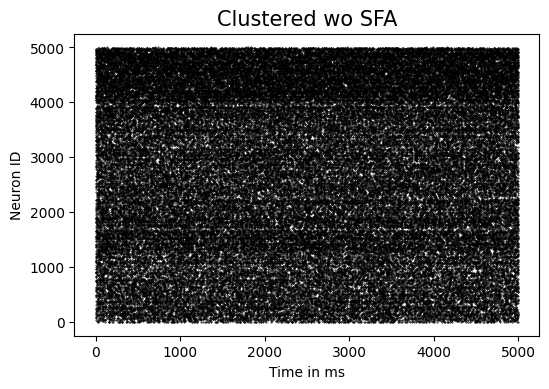

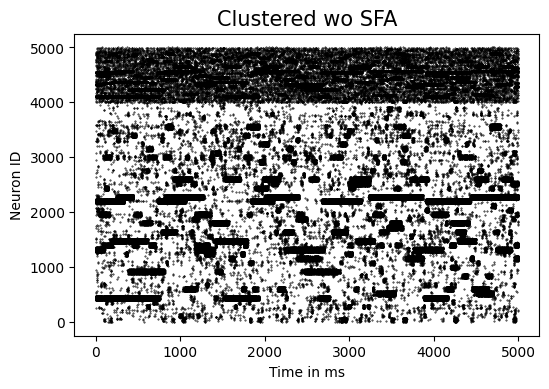

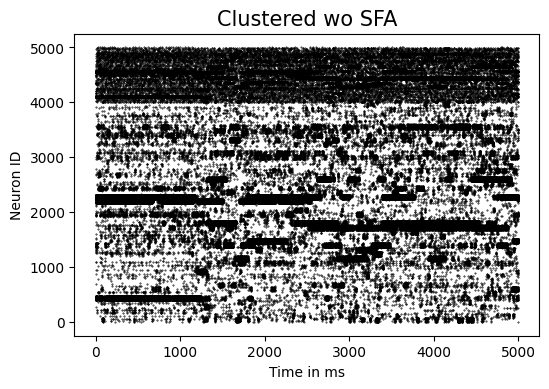

In [4]:
import matplotlib.pyplot as plt

one_cluster = []

neuron_ID = 0

for model in range(len(models)):

  condition = [True if i > neuron_ID and i <= neuron_ID+5000 else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x,new_y,'.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[i], fontsize = 15)

  new = [new_x, new_y]

  one_cluster.append(new)

### Create spike count matrix

In [5]:
neurons = [51, 52, 53, 
           151, 156, 157, 
           171, 173, 185, 
           250, 251, 317, 
           331, 360, 390, 
           402, 404, 407, 
           540, 541, 550, 
           590, 609, 621, 
           651, 655, 692,
           737, 755, 784,
           809, 812, 851,
           891, 930, 950,
           963, 1001, 1018,
           1041, 1059, 1081,
           1122, 1131, 1170, 
           1211, 1273, 1278,
           1287, 1290, 1328,
           1361, 1380, 1390, 
           1479, 1490, 1519,
           1567, 1574, 1581,
           1648, 1649, 1650,
           1751, 1752, 1753,
           1837, 1838, 1839, 
           1871, 1872, 1873,
           1996, 1997, 1998,
           2027, 2028, 2029,
           2084, 2088, 2094,
           2228, 2229, 2230, 
           2317, 2318, 2319, 
           2354, 2355, 2377,
           2461, 2462, 2463,
           2532, 2533, 2535, 
           2625, 2627, 2628,
           2659, 2670, 2667, 
           2725, 2736, 2773, 
           2814, 2816, 2858, 
           2910, 2912, 2914, 
           3035, 3036, 3037,
           3116, 3117, 3118, 
           3164, 3165, 3166, 
           3263, 3264, 3267, 
           3299, 3300, 3301,
           3416, 3417, 3418,
           3485, 3487, 3490, 
           3522, 3523, 3524, 
           3641, 3651, 3657, 
           3688, 3694, 3740,
           3766, 3782, 3802,
           3882, 3887, 3995, 
           3932, 3934, 3949]

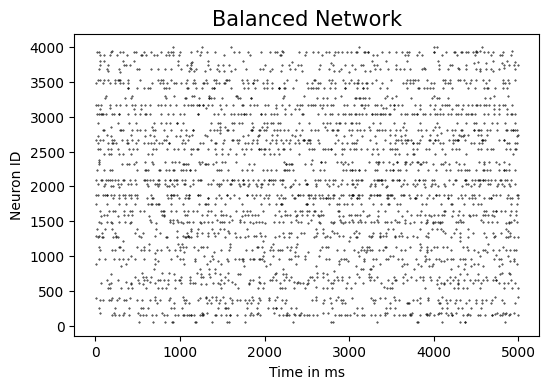

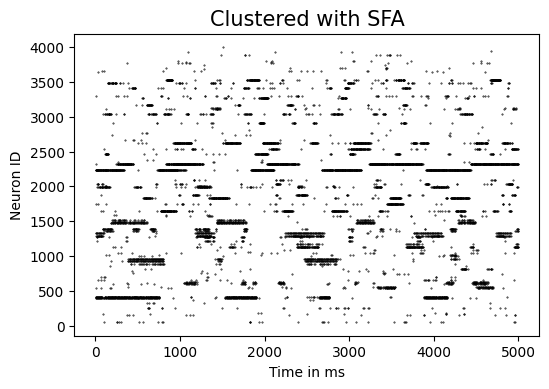

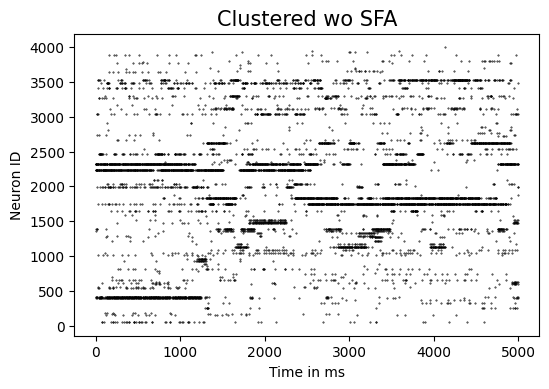

In [6]:
import matplotlib.pyplot as plt

three_neurons_per_cluster = []

for model in range(len(models)):

  condition = [True if i in neurons else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x, new_y, '.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[model], fontsize = 15)

  new = [new_x, new_y]
  new_array = np.array(new)

  three_neurons_per_cluster.append(new_array)

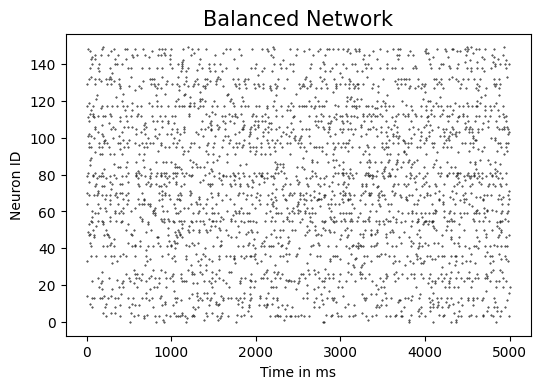

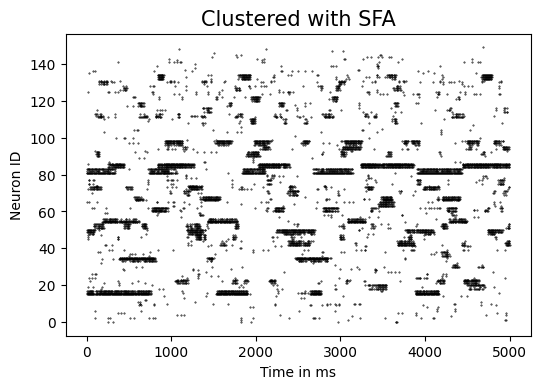

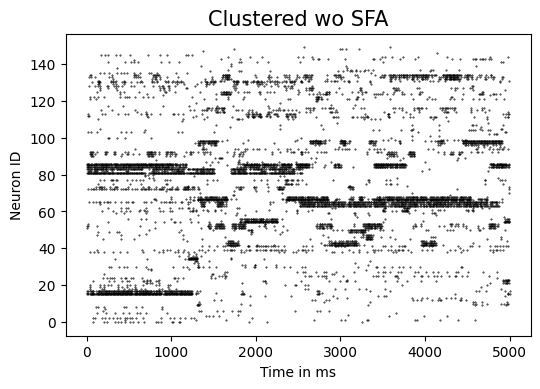

In [7]:
new_neuron_IDs = range(150)

for model in range(len(models)):

  for neuron in range(len(neurons)):

    three_neurons_per_cluster[model][np.where(three_neurons_per_cluster[model] == neurons[neuron])] = new_neuron_IDs[neuron]

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1], '.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[model], fontsize = 15)

In [8]:
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(three_neurons_per_cluster[i][0]+ 1)/window)

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix = np.zeros((len(models), intervals, len(neurons)))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(three_neurons_per_cluster[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, len(neurons)))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(len(neurons)):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == new_neuron_IDs[k])

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix[i] = spike_counts

np.save(file_name, spike_count_matrix)

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix.shape) + " representing " + 
      str(spike_count_matrix.shape[0]) + " models, " + str(spike_count_matrix.shape[1]) + " intervals, and " + str(spike_count_matrix.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix)

We have 100 intervals, each 50ms long. 

The spike count matrix has the shape: (3, 100, 150) representing 3 models, 100 intervals, and 150 neurons. 

Spike count matrix: 

[[[0. 0. 0. ... 1. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 2. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [9]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(len(neurons))] #rows represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] #columns represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  current = spike_count_matrix[i]
  data = pd.DataFrame(data = current, index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data.append(data)

#exemplarily show the dataframe for the second model
models_data[2].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron111,Neuron112,Neuron113,Neuron114,Neuron115,Neuron116,Neuron117,Neuron118,Neuron119,Neuron120,Neuron121,Neuron122,Neuron123,Neuron124,Neuron125,Neuron126,Neuron127,Neuron128,Neuron129,Neuron130,Neuron131,Neuron132,Neuron133,Neuron134,Neuron135,Neuron136,Neuron137,Neuron138,Neuron139,Neuron140,Neuron141,Neuron142,Neuron143,Neuron144,Neuron145,Neuron146,Neuron147,Neuron148,Neuron149,Neuron150
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Interval5,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
Interval97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

###Spike count matrix with cluster average:

In [10]:
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(time_range_models[i][0]+ 1)/window)

#define which neurons to focus on (here: only excitatory neurons 0 - 4000)
Nneurons = int(np.max(time_range_models[i][1])+1) - 1000

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix_average = np.zeros((len(models), intervals, Nneurons))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(time_range_models[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, Nneurons))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(Nneurons):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == k)

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix_average[i] = spike_counts

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix_average.shape) + " representing " + 
      str(spike_count_matrix_average.shape[0]) + " models, " + str(spike_count_matrix_average.shape[1]) + " intervals, and " + str(spike_count_matrix_average.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix_average)

We have 100 intervals, each 50ms long. 

The spike count matrix has the shape: (3, 100, 4000) representing 3 models, 100 intervals, and 4000 neurons. 

Spike count matrix: 

[[[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [11]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(Nneurons)] #rows represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] #columns represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data_average = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  current = spike_count_matrix_average[i]
  data_average = pd.DataFrame(data = current, index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data_average.append(data_average)

#exemplarily show the dataframe for the second model
models_data_average[2].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron3961,Neuron3962,Neuron3963,Neuron3964,Neuron3965,Neuron3966,Neuron3967,Neuron3968,Neuron3969,Neuron3970,Neuron3971,Neuron3972,Neuron3973,Neuron3974,Neuron3975,Neuron3976,Neuron3977,Neuron3978,Neuron3979,Neuron3980,Neuron3981,Neuron3982,Neuron3983,Neuron3984,Neuron3985,Neuron3986,Neuron3987,Neuron3988,Neuron3989,Neuron3990,Neuron3991,Neuron3992,Neuron3993,Neuron3994,Neuron3995,Neuron3996,Neuron3997,Neuron3998,Neuron3999,Neuron4000
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [12]:
cluster_length = 80
clusters = int(Nneurons/cluster_length) - 45

for cluster in range(clusters):
  cols = [1,2,3,4]
  new_df = models_data_average[2][models_data_average[2].columns[cols]]
  print(models_data_average[2])
  print("-------------------space---------------------")
  print(new_df)


             Neuron1  Neuron2  Neuron3  ...  Neuron3998  Neuron3999  Neuron4000
Interval1        0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval2        1.0      0.0      0.0  ...         0.0         0.0         0.0
Interval3        0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval4        0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval5        1.0      1.0      0.0  ...         0.0         0.0         0.0
...              ...      ...      ...  ...         ...         ...         ...
Interval96       0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval97       0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval98       0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval99       0.0      0.0      0.0  ...         0.0         0.0         0.0
Interval100      0.0      0.0      0.0  ...         0.0         0.0         0.0

[100 rows x 4000 columns]
-------------

In [ ]:
models_data_average[2].mean(axis = 1)

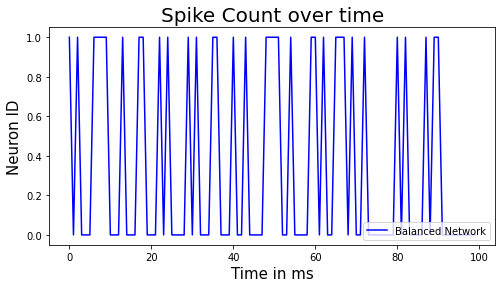

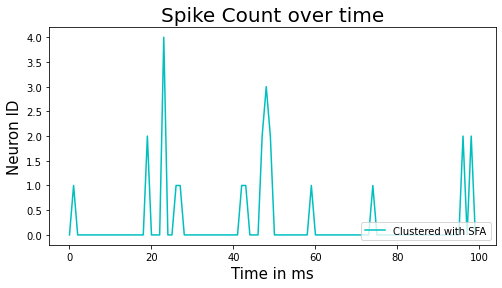

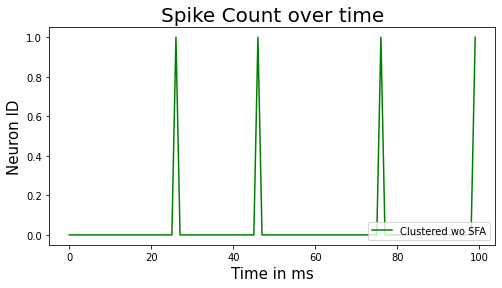

In [ ]:
neuron = 70

for model in range(len(models)):

  one_neuron = []

  for timepoint in range(len(spike_count_matrix[model][:])):
    one_neuron.append(spike_count_matrix[model][timepoint][neuron])

  #define figure fig with a certain size
  fig = plt.figure(figsize = (8,4))
  #define axis, two axis, index position = 1
  ax = fig.add_subplot(1,1,1) 
  #set labels and title of figure
  ax.set_xlabel('Time in ms', fontsize = 15)
  ax.set_ylabel('Neuron ID', fontsize = 15)
  ax.set_title('Spike Count over time', fontsize = 20)

  #define colors for different models
  colors = ['b', 'c', 'g']

  #for neuron in range(len(spike_count_matrix[model][0])):

  #plot the data
  ax.plot(range(len(one_neuron)), one_neuron, color = colors[model], label = model_names[model])
  #fill area of positive and negative errors
  plt.legend(loc = "lower right")

In [ ]:
'''
silent_neurons = []
all_models_silent = []

for model in range(len(models)):
  model_silent_neurons = []
  for neuron in range(len(neurons)):
    if models_data[model].iloc[:, neuron].sum(0) == 0:
      model_silent_neurons.append(neuron+1)
  silent_neurons.append(model_silent_neurons)

len(silent_neurons[0]), len(silent_neurons[1]), len(silent_neurons[2])

for model in range(len(models)):
  for neuron_number in range(len(silent_neurons[model])):
    neuron = silent_neurons[model][neuron_number]
    del models_data[model]["Neuron" + str(neuron)]
'''
'''
 data_array = []
 for model in range(len(models)): 
  new_array = models_data[model].to_numpy()
  data_array.append(new_array)
'''

In [ ]:
!pip install git+git://github.com/lindermanlab/ssm
import ssm

  Cloning git://github.com/lindermanlab/ssm to /tmp/pip-req-build-7lyuz7ty
  Running command git clone -q git://github.com/lindermanlab/ssm /tmp/pip-req-build-7lyuz7ty
  Created wheel for ssm: filename=ssm-0.0.1-cp37-cp37m-linux_x86_64.whl size=400836 sha256=035dc48de9a78dd0c2d2a52351b3ec13a8ed3153dd87c4c9ed18acc131bc91ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-koydr0mt/wheels/82/71/55/886c7f4ed86fbde1aa2f4e598d010b6d9a761be84320ac95ec
Successfully built ssm


In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as st
import multiprocessing

import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(3)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names=['windows blue','red','amber','faded green','dusty purple','orange','steel blue','pink',
             'greyish','mint','clay','light cyan','forest green','pastel purple','salmon','dark brown',
             'lavender','pale green','dark red','gold','dark teal','rust','fuchsia','pale orange',
             'cobalt blue','mahogany','cloudy blue','dark pastel green','dust','electric lime','fresh green','light eggplant']

color = sns.xkcd_palette(color_names)
cmap = gradient_cmap(color)

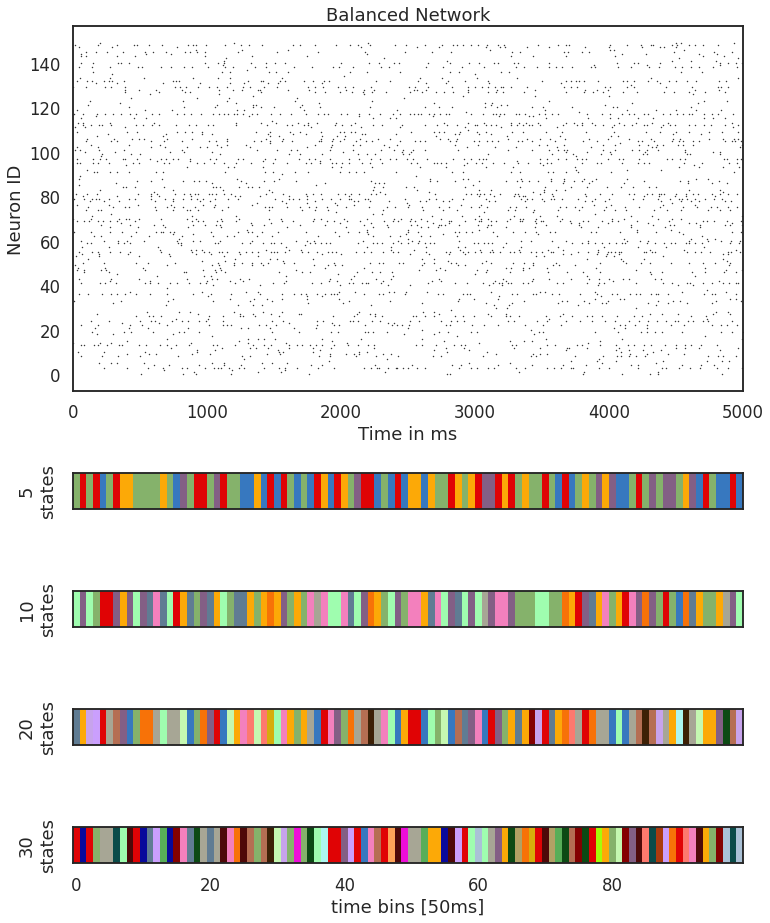

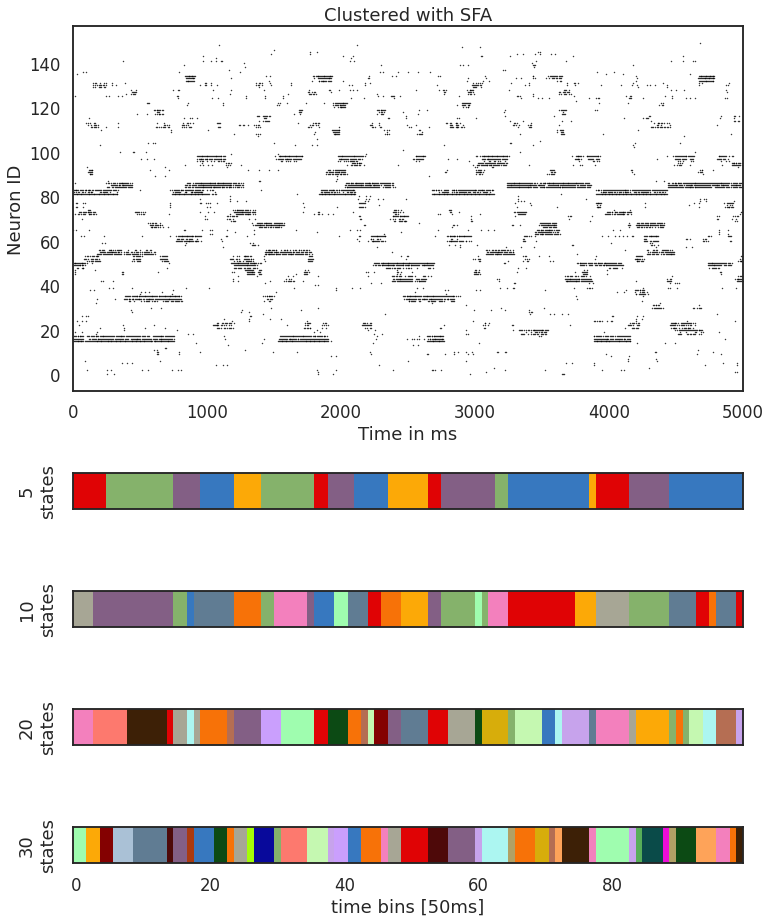

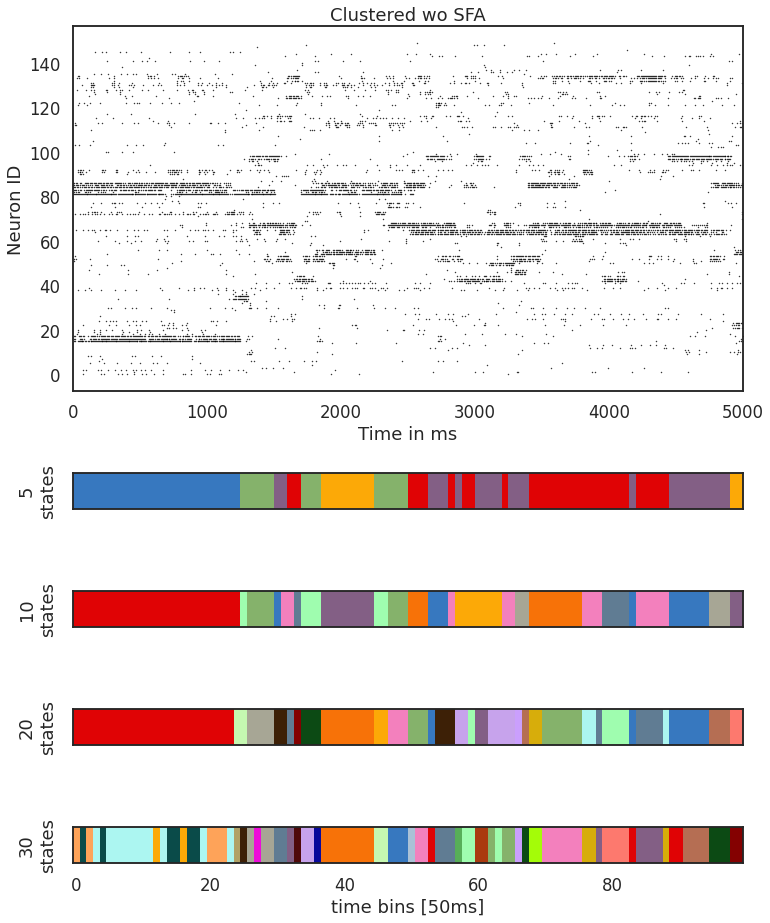

In [ ]:
model_states = []

N_iters = 50
num_states = [5, 10, 20, 30]    # number of discrete states
time_bins = intervals

height_ratios = [10] + [1]*len(num_states)

for model in range(len(models)):

  model_hmm_z = []
  
  obs_dim = int(data_array[model].shape[1])     # dimensionality of observation

  fig, axes = plt.subplots(len(num_states)+1,1,figsize=(12, 15),gridspec_kw={'height_ratios':height_ratios})

  #create subplot
  axes[0].plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1],'.k',markersize = 0.8) 

  #label the plot
  axes[0].set_xlim([0, 5000])
  axes[0].set_xlabel('Time in ms')
  axes[0].set_ylabel('Neuron ID')
  axes[0].set_title(model_names[model])

  for state in range(len(num_states)):

    ##===== Create HMM object to fit =====## 
    hmm = ssm.HMM(num_states[state], obs_dim, observations="gaussian")

    #This beautiful line of code hides all the business of fitting Hidden Markov models to data under the hood.
    #Go look at the source code and marvel at how code should be written. 
    hmm_lls = hmm.fit(data_array[model], method="em", num_iters=N_iters, init_method="kmeans")
    #hmm_lls = hmm.fit(training_data, method="em", num_iters=N_iters)

    # Plot the true and inferred discrete states
    hmm_z = hmm.most_likely_states(data_array[model])

    model_hmm_z.append(hmm_z)

    axes[state + 1].imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(color)-1)
    axes[state + 1].set_yticklabels([])
    axes[state + 1].set_ylabel(str(num_states[state]) + "\nstates")

    if state < len(num_states)-1:    
      axes[state + 1].set_xticklabels([])

  axes[len(num_states)].set_xlabel("time bins [50ms]")

  model_states.append(model_hmm_z)

  #arrange subplots 
  fig.subplots_adjust(top = 0.90, hspace = 0.8)




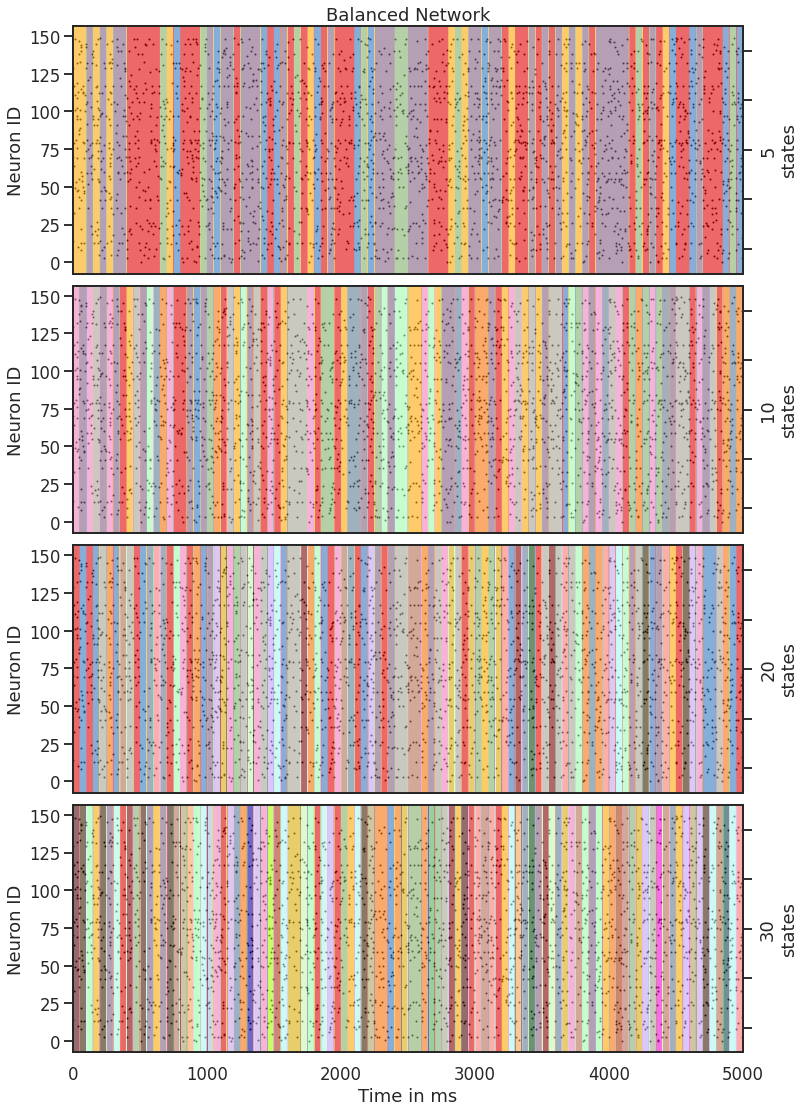

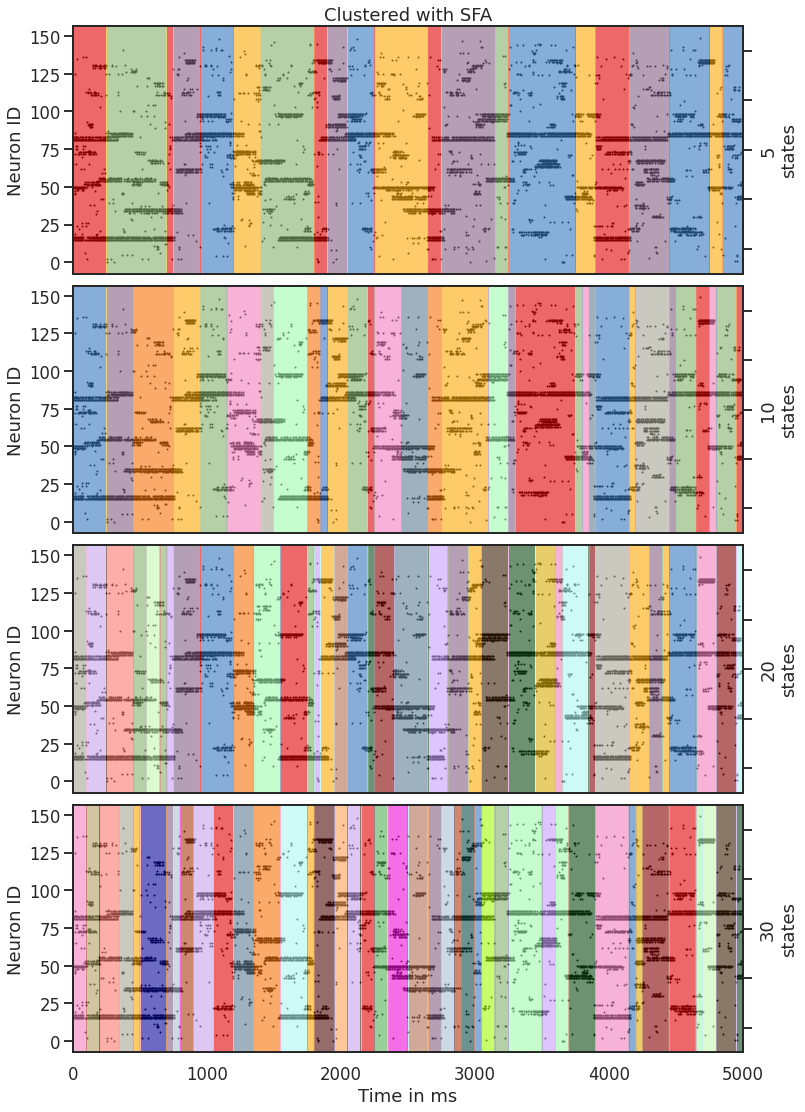

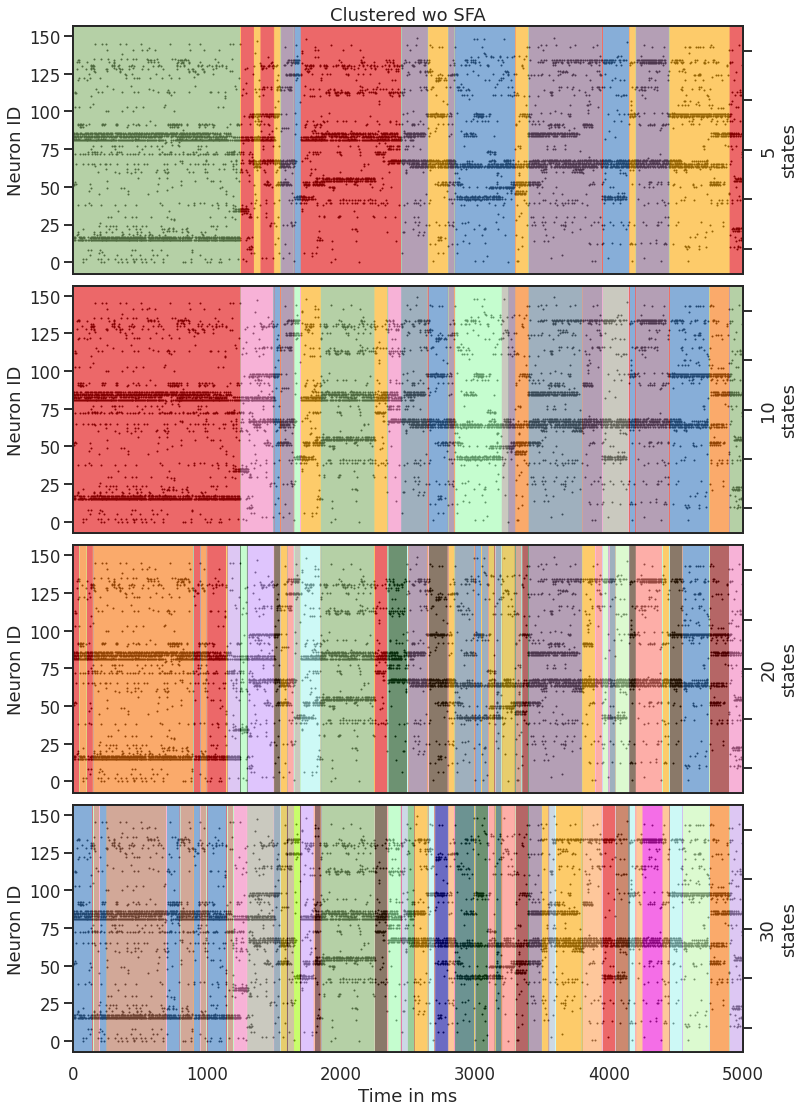

In [ ]:
model_states = []

N_iters = 50
num_states = [5, 10, 20, 30]   # number of discrete states
time_bins = intervals

height_ratios = [10]*len(num_states)

for model in range(len(models)):

  model_hmm_z = []
  
  obs_dim = int(data_array[model].shape[1])     # dimensionality of observation

  fig, axes = plt.subplots(len(num_states),1,figsize=(12, 30),gridspec_kw={'height_ratios':height_ratios})

  #create subplot
  #axes[0].plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1],'.k',markersize = 0.8) 

  #label the plot
  #axes[0].set_xlim([0, 5000])
  #axes[0].set_xlabel('Time in ms')
  #axes[0].set_ylabel('Neuron ID')
  #axes[0].set_title(model_names[model])

  for state in range(len(num_states)):

    if state == 0: 
      axes[state].set_title(model_names[model])

    ##===== Create HMM object to fit =====## 
    hmm = ssm.HMM(num_states[state], obs_dim, observations="gaussian")

    #This beautiful line of code hides all the business of fitting Hidden Markov models to data under the hood.
    #Go look at the source code and marvel at how code should be written. 
    hmm_lls = hmm.fit(data_array[model], method="em", num_iters=N_iters, init_method="kmeans")
    #hmm_lls = hmm.fit(training_data, method="em", num_iters=N_iters)

    # Plot the true and inferred discrete states
    hmm_z = hmm.most_likely_states(data_array[model])

    model_hmm_z.append(hmm_z)

    #create subplot
    axes[state].plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1],'.k',markersize = 2) 

    #label the plot
    axes[state].set_xlim([0, 5000])
    axes[state].set_ylabel('Neuron ID')


    ax2 = axes[state].twinx()

    test = np.repeat(hmm_z[None,:],50)

    ax2.imshow(test[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(color)-1,alpha=0.6)
    ax2.set_yticklabels([])
    ax2.set_ylabel(str(num_states[state]) + "\nstates")
    ax2.grid(False,axis='y')
    ax2.autoscale(tight=True)

    if state < len(num_states)-1:    
      ax2.set_xticklabels([])
    
  axes[state].set_xlabel('Time in ms')

  #axes[len(num_states)].set_xlabel("time bins [50ms]")

  model_states.append(model_hmm_z)

  #arrange subplots 
  fig.subplots_adjust(top = 0.6, hspace = 0.05)

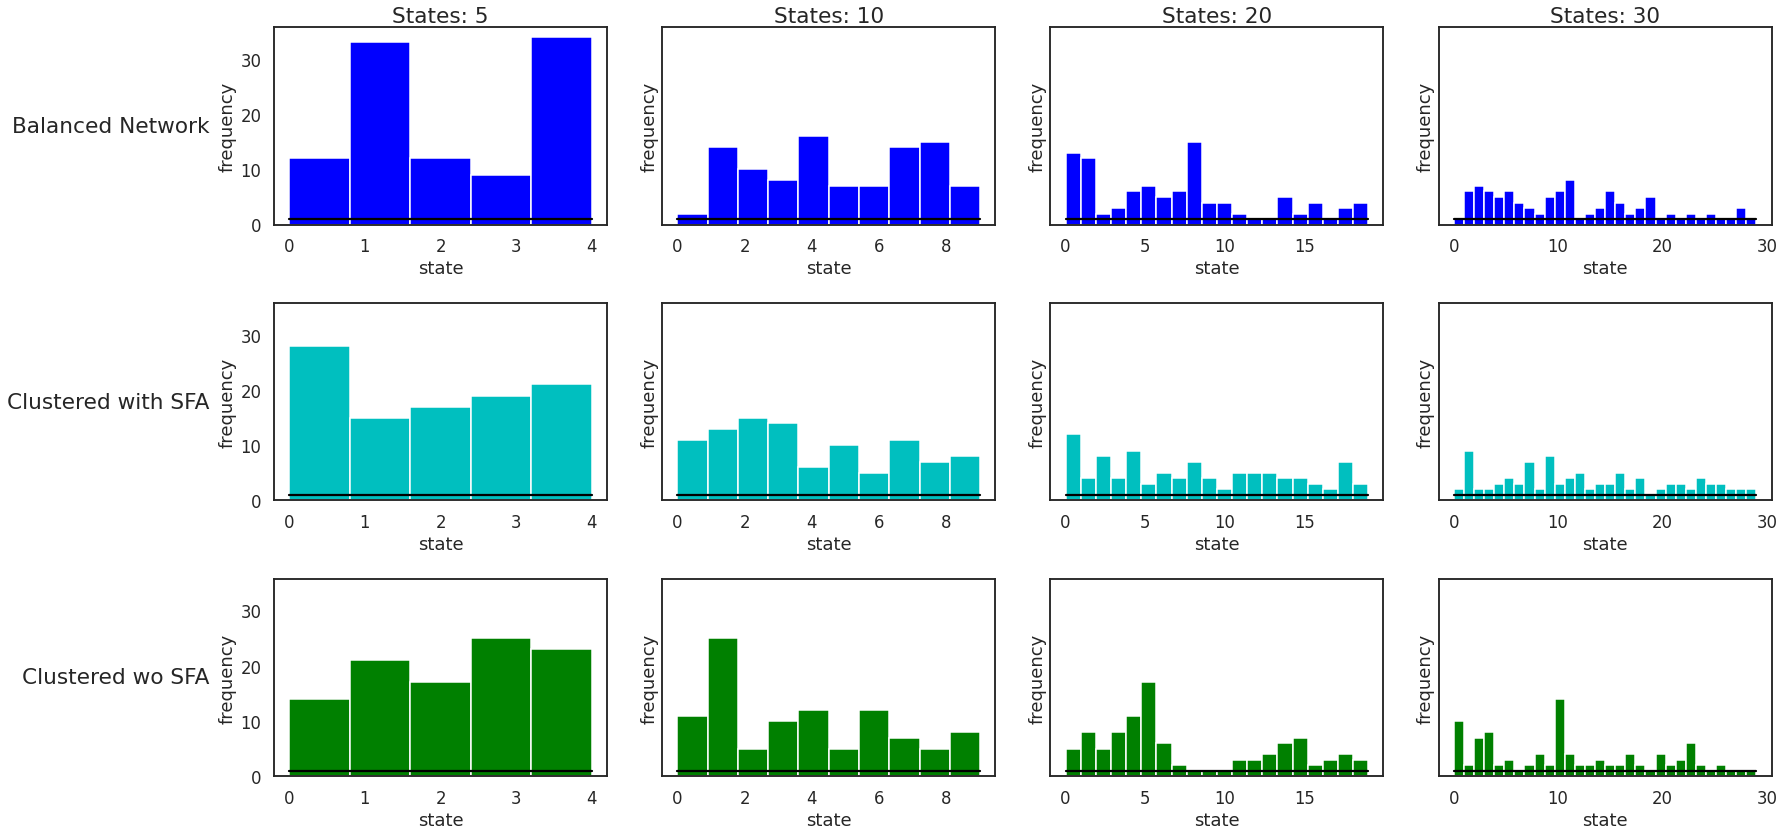

In [ ]:
#initiate figure and axes with specific size, rows = number of models, columns = number of intervals
fig, axes = plt.subplots(figsize= (25, 12), nrows=len(models), ncols=len(num_states), sharey = True)

#define title for columns and rows (states and model names)
cols = ['States: {}'.format(col) for col in num_states]
rows = ['{}'.format(row) for row in model_names]

#define x and y axes of each subplot (neurons and spike count)
plt.setp(axes.flat, xlabel='state', ylabel='frequency')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
    
#labels rows
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.15, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

#for every interval
for state in range(len(num_states)):
  #for every model
  for model in range(len(models)):
    #make subplots, intervals in columns, models in rows, different color for every model
    axes[model, state].hist(model_states[model][state], num_states[state], color = colors[model])

    #plot the threshold line
    axes[model, state].plot(range(num_states[state]), [1]*num_states[state], color = "k")

#show the figure
plt.show()

In [ ]:
'''
#initiate figure and axes with specific size, rows = number of models, columns = number of intervals
fig, axes = plt.subplots(figsize= (20, 4), nrows=1, ncols=len(models), sharey = True)

#define title for columns and rows (intervals and model names)
cols = ['{}'.format(col) for col in model_names]

#define x and y axes of each subplot (neurons and spike count)
plt.setp(axes.flat, xlabel='state', ylabel='frequency')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes, cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.2, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

#for every model
for model in range(len(models)):

  #plot the data
  axes[model].hist(model_states[model], num_states, color = colors[model], label = model_names[model])

  #plot the threshold line
  axes[model].plot(range(num_states), [1]*num_states, color = "k")

#show the figure
plt.show()
'''

In [ ]:
'''
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(time_range_models[i][0]+ 1)/window)

#define which neurons to focus on 
neurons = 5000

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix = np.zeros((len(models), intervals, neurons))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(one_cluster[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, neurons))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(neurons):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == neuron_ID+k)

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix[i] = spike_counts

np.save(file_name, spike_count_matrix)

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix.shape) + " representing " + 
      str(spike_count_matrix.shape[0]) + " models, " + str(spike_count_matrix.shape[1]) + " intervals, and " + str(spike_count_matrix.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix)
'''